In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
df=pd.read_csv("wines_SPA.csv")
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [37]:
df=df.drop(["country"],axis=1)
df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [38]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ["winery", "wine", "region", "price", "type"]
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    df

In [40]:
df["acidity"]=df["acidity"].fillna(df["acidity"].sum())
df["year"]=df["year"].fillna(df["year"][1])

In [41]:
df.isnull().sum()

winery            0
wine              0
year              0
rating            0
num_reviews       0
region            0
price             0
type              0
body           1169
acidity           0
dtype: int64

In [42]:
df.dtypes

winery           int32
wine             int32
year            object
rating         float64
num_reviews      int64
region           int32
price            int64
type             int32
body           float64
acidity        float64
dtype: object

In [51]:
df.shape

(6873, 10)

In [64]:
low_price=df["price"].quantile(0.05)
high_price=df["price"].quantile(0.95)
df=df[(df["price"]>=low_price)&(df["price"]<=high_price)]
df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
1268,280,450,2006.0,4.3,419,37,158,21,0.0,18655.0
1269,219,766,2016.0,4.3,419,57,266,11,5.0,3.0
1271,35,285,2016.0,4.3,411,57,231,11,5.0,3.0
1272,156,274,2016.0,4.3,410,57,146,11,5.0,3.0
2000,271,619,2015.0,4.2,420,59,88,12,0.0,18655.0
...,...,...,...,...,...,...,...,...,...,...
7482,292,639,2015.0,4.2,414,54,75,0,3.0,3.0
7483,268,812,2018.0,4.2,410,59,39,12,4.0,3.0
7484,88,194,2015.0,4.2,412,57,419,11,5.0,3.0
7485,453,342,2011.0,4.2,410,57,565,11,5.0,3.0


In [65]:
from scipy import stats
z_scores=np.abs(stats.zscore(df))
z_scores

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
1268,0.250434,0.102724,1.914404,24.596748,0.901303,0.366541,0.386550,3.086804,2.762737,3.073805
1269,0.320226,1.188992,0.653673,24.596748,0.901303,0.558976,0.224502,0.346997,1.054886,0.325330
1271,2.041562,0.777196,0.653673,24.596748,1.032753,0.558976,0.026476,0.346997,1.054886,0.325330
1272,0.909597,0.822161,0.653673,24.596748,1.274511,0.558976,0.454445,0.346997,1.054886,0.325330
2000,0.166238,0.588099,0.396865,0.040656,1.143060,0.651527,0.782602,0.620978,2.762737,3.073805
...,...,...,...,...,...,...,...,...,...,...
7482,0.362695,0.669853,0.396865,0.040656,0.307482,0.420148,0.856155,2.666790,0.472163,0.325330
7483,0.138173,1.377027,1.167288,0.040656,1.274511,0.651527,1.059839,0.620978,0.291362,0.325330
7484,1.545742,1.149178,0.396865,0.040656,0.790996,0.558976,1.090159,0.346997,1.054886,0.325330
7485,1.868863,0.544197,0.630365,0.040656,1.274511,0.558976,1.916210,0.346997,1.054886,0.325330


In [70]:
low_wine=df["wine"].quantile(0.5)
high_wine=df["wine"].quantile(0.97)
df=df[(df["wine"]>=low_wine)&(df["wine"]<=high_wine)]

In [71]:
df=df[(z_scores <3).all(axis=1)]
df[:100]

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_15332\1888572666.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[(z_scores <3).all(axis=1)]


,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
2026,200,690,2017.0,4.2,420,2,105,10,4.0,3.0
2027,152,675,2011.0,4.2,420,21,184,10,4.0,3.0
2029,250,669,2004.0,4.2,417,59,503,12,4.0,3.0
2051,200,690,2017.0,4.2,420,2,105,10,4.0,3.0
2052,152,675,2011.0,4.2,420,21,184,10,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2804,250,669,2004.0,4.2,417,59,503,12,4.0,3.0
2826,200,690,2017.0,4.2,420,2,105,10,4.0,3.0
2827,152,675,2011.0,4.2,420,21,184,10,4.0,3.0
2829,250,669,2004.0,4.2,417,59,503,12,4.0,3.0


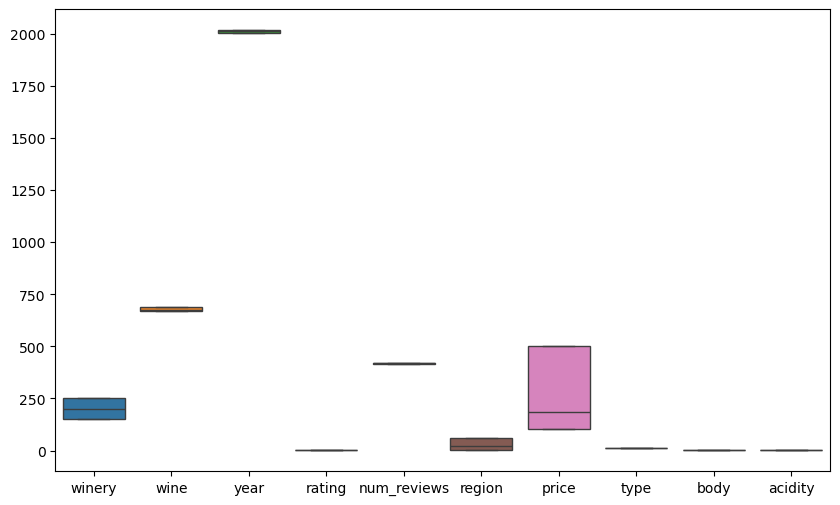

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

In [73]:
high_rew=df["num_reviews"].quantile(0.92)
low_rew=df["num_reviews"].quantile(0.5)
df=df[(df["num_reviews"]<=high_rew)&(df["num_reviews"]>=low_rew)]
df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
2026,200,690,2017.0,4.2,420,2,105,10,4.0,3.0
2027,152,675,2011.0,4.2,420,21,184,10,4.0,3.0
2051,200,690,2017.0,4.2,420,2,105,10,4.0,3.0
2052,152,675,2011.0,4.2,420,21,184,10,4.0,3.0
2076,200,690,2017.0,4.2,420,2,105,10,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
7428,152,675,2011.0,4.2,420,21,184,10,4.0,3.0
7452,200,690,2017.0,4.2,420,2,105,10,4.0,3.0
7453,152,675,2011.0,4.2,420,21,184,10,4.0,3.0
7477,200,690,2017.0,4.2,420,2,105,10,4.0,3.0


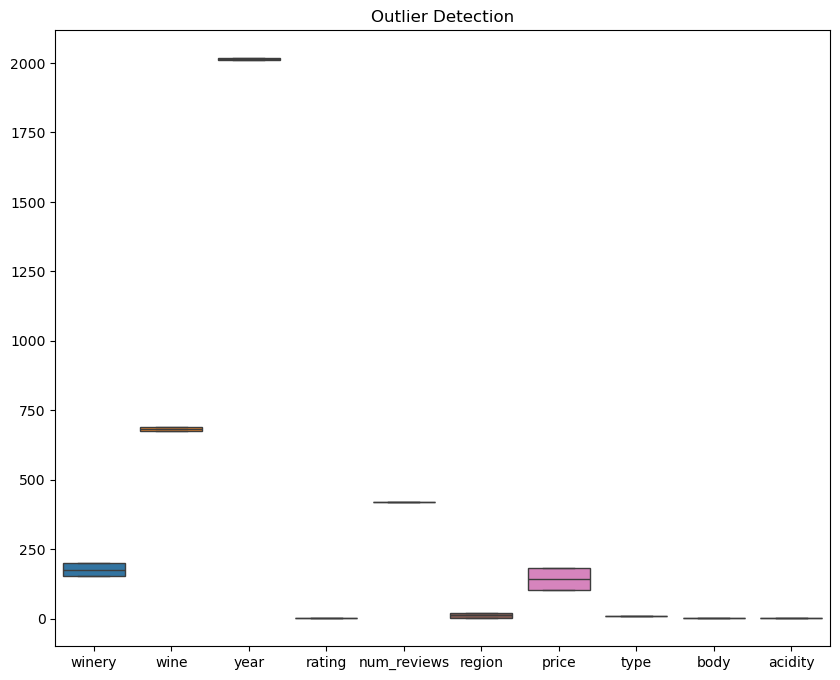

In [84]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.title("Outlier Detection")
plt.show()

In [85]:
df.replace('N.V.',np.nan,inplace=True)
df.fillna(0,inplace=True)

In [92]:
X=df.drop(['price'],axis=1)
y=df["price"]
from sklearn.decomposition import PCA
pca=PCA(0.95)
X=pca.fit_transform(X)
df=df.drop(['year','rating','acidity','body','type'],axis=1)
df


,winery,wine,num_reviews,region,price
2026,200,690,420,2,105
2027,152,675,420,21,184
2051,200,690,420,2,105
2052,152,675,420,21,184
2076,200,690,420,2,105
...,...,...,...,...,...
7428,152,675,420,21,184
7452,200,690,420,2,105
7453,152,675,420,21,184
7477,200,690,420,2,105


In [102]:
from sklearn.model_selection import cross_val_score, KFold
kf=KFold(n_splits=3,shuffle=True, random_state=42)


In [106]:

from sklearn.linear_model import LinearRegression
model=LinearRegression()
cv=cross_val_score(model,X,y,cv=kf,scoring='neg_mean_squared_error')

In [98]:
model.score(X_test,y_test)

1.0

In [99]:
model.score(X_train,y_train)

1.0